In [1]:
import numpy as np
import random
import DNA
import mutation
from DNA import *

In [2]:
help(mutation)

Help on module mutation:

NAME
    mutation - This module is for various mutations of sequence data.

DESCRIPTION
    Functions include random RNA generator, mutation programs that modify the RNA strings
    and mutations finder programs that attempt to identify the mutation.
    
    Copyright Benjamin Clyde, 2017

FUNCTIONS
    deletion(rna)
        Function to take an RNA string and randomly choose an index for the string and then
        randomly delete 1-9 nucleotides sequentially and return the new RNA string
    
    find_codon_diff(protein, mutated_protein)
        Function to find the effect the SNP had on the protein.
        First compares the length of the proteins to see if the SNP caused a premature
        stop codon, otherwise, returns the new codon.
    
    find_deletion(rna, deleted_rna)
        Function to find the deleted sequence from an RNA seq
        First takes the difference in length between the two sequences to find the amount
        of nucleotides that we

In [3]:
rna1 = mutation.random_rna(99)
rna2 = mutation.random_rna(99)


In [4]:
rna1

'AUGUACACUAUCACUCUCGCCCCCACCACGUGGGGCAGCUUACAAACCAAUGGGUCAGAGUGGCACACCUCAGGCGAGCACGUCUCGAUGAACAGGUGA'

In [5]:
rna2

'AUGUGGAUCCGCUUUGGACUAGUCGAUAGGAACCCUAGUGCCUUCCAUCUGAGAUUGAUAUGCGGGGCGAUAACCCAACGUAGCUUGGCUAGUCUCUGA'

In [6]:
def dotplot_list_of_lists(dna_x, dna_y):
    dotplot_matrix = [['0' for x in dna_x] for y in dna_y]
    for x_index, x_value in enumerate(dna_x):
        for y_index, y_value in enumerate(dna_y):
            if x_value == y_value:
                dotplot_matrix[y_index][x_index] = '1'
    return dotplot_matrix

dna_x = 'TAATGCCTGAAT'
dna_y = 'CTCTATGCC'

M = dotplot_list_of_lists(dna_x, dna_y)

[[1 0 0 ..., 0 1 1]
 [0 1 1 ..., 1 0 0]
 [0 1 1 ..., 1 0 0]
 ..., 
 [0 1 1 ..., 1 0 0]
 [1 0 0 ..., 0 1 1]
 [1 0 0 ..., 0 1 1]]


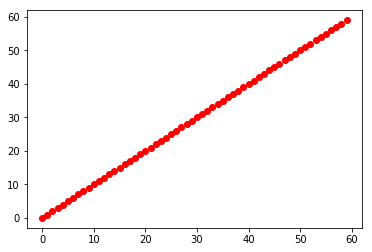

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [7]:
def dotplot(dna_x, dna_y):
    dotplot_matrix = np.zeros((len(dna_y), len(dna_x)), np.int)
    for x_index, x_value in enumerate(dna_x):
        for y_index, y_value in enumerate(dna_y):
            if x_value == y_value:
                dotplot_matrix[y_index,x_index] = 1
    return dotplot_matrix

dna_x = 'ATTGCAGCTTAAGGAATCGTGCAGATTAAAGGCACCACGAATTAAGACCAGGGACATAA'
dna_y = 'ATTGCAGCGGAAGGAATACTGCAGGTTAAAGTCACCAGGAATTCAGACCAGTTTCATAA'

print(dotplot(dna_x, dna_y))


#dna_y = 'ATTGCAGCCTAAGGAATCGTGCAGATTAAACTCACCACGAATTAAGACCAGGGACATAT'
p = dotplot(dna_x, dna_y)
from matplotlib.pyplot import plot, show
p = np.eye(60) # test
x = [i for i in range(p.shape[1]) for j in range(p.shape[0]) if p[i,j] == 1]
y = [j for i in range(p.shape[1]) for j in range(p.shape[0]) if p[i,j] == 1]
plot(x, y, 'ro')
show()

# Test
M = dotplot_list_of_lists(dna_x, dna_y)
#for i in range(p.shape[0]):
    #for j in range(p.shape[1]):
        #assert p[i,j] == int(M[i][j]), '%s vs %s' % (p[i,j], int(M[i][j]))
print(p)

In [8]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [9]:
help(np.eye)

Help on function eye in module numpy.lib.twodim_base:

eye(N, M=None, k=0, dtype=<class 'float'>)
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    
    Returns
    -------
    I : ndarray of shape (N,M)
      An array where all elements are equal to zero, except for the `k`-th
      diagonal, whose values are equal to one.
    
    See Also
    --------
    identity : (almost) equivalent function
    diag : diagonal 2-D array from a 1-D array specified by the user.
    
    Examples
    --------
    >>> np.eye(2, dtype=int)
    arra

In [46]:
class DNA(str):
    """
    Class for representing DNA sequences as strings
    """
    basecomplement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'U': 'A'}
    dna_codon_table = {"TTT":"F", "TTC":"F", "TTA":"L", "TTG":"L",
                       "TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S",
                       "TAT":"Y", "TAC":"Y", "TAA":"STOP", "TAG":"STOP",
                       "TGT":"C", "TGC":"C", "TGA":"STOP", "TGG":"W",
                       "CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
                       "CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
                       "CAT":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
                       "CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R",
                       "ATT":"I", "ATC":"I", "ATA":"I", "ATG":"M",
                       "ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
                       "AAT":"N", "AAC":"N", "AAA":"K", "AAG":"K",
                       "AGT":"S", "AGC":"S", "AGA":"R", "AGG":"R",
                       "GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
                       "GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A",
                       "GAT":"D", "GAC":"D", "GAA":"E", "GAG":"E",
                       "GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G"}
    def __init__(self, seq):
        """Create DNA object to string seq."""
        if set(seq.upper()).issubset({'A','T','C','G','N'}):
            self.seq = seq.upper()
        else:
            raise ValueError("DNA has illegal character")
    
    def transcribe(self):
        """
        Transcribes a DNA sequence by replacing thymine (T) with uracil (U)
        """
        return self.seq.replace('T', 'U')
    
    def complement(self):
        """
        Finds the complement of the sequence by list comprehension using dictionary of complement values
        """
        basecomplement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'U': 'A', 'N': 'N'}
        bases = list(self)
        comp = [basecomplement[base] for base in bases]
        return ''.join(comp)

    def reverse(self):
        """
        Reverses a sequence, used to get the 5' orientation of the complement strand of a sequence
        """
        return self[::-1]

    def gc_content(self):
        """
        Calculates the GC content of a sequence, which is important to know in molecular biology
        """
        gc_percent = (self.count('G') + self.count('C')) / len(self)
        return gc_percent * 100

    def codons(self, rf=0):
        """
        Finds the list of codons in a sequence in a given reading frame.

        In a sequence there are 6 possible reading frames, 3 on the forward strand, 3 on the complement.
        Arguments: sequence for splitting in to codons
        rf: reading frame. 0 = 1st forward frame; 1 = 2nd forward frame; 2 = 3rd forward frame
            3 = 1st complement frame; 4 = 2nd complement frame; 5 = 3rd complement frame
        Returns: list of codons in sequence for specified reading frame
        """
        if rf == 0:
            stoppoint = len(self) - (len(self) % 3)
            return [self[i:i+3] for i in range(rf, stoppoint, 3)]
        if rf == 1:
            stoppoint = len(sequence[rf:]) - (len(self[rf:]) % 3)
            return [self[i:i+3] for i in range(rf, stoppoint, 3)]
        if rf == 2:
            stoppoint = len(self[2:]) - (len(self[2:]) % 3)
            return [self[i:i+3] for i in range(rf, stoppoint, 3)]
        if rf == 3 or rf == 4 or rf == 5:
            new_s = complement(self)
            stoppoint = len(new_s[rf-3:]) - (len(new_s[rf-3:]) % 3)
            return [new_s[i:i+3] for i in range(rf-3, stoppoint, 3)]
        else:
            raise ValueError("Reading frame rf must be a value from 0-5")
    
    def translate(self):
        """
        Translates an mRNA sequence into a protein sequence using the mRNA codon look up dictionary
        """
        protein = ""
        for i in range(0, len(self) - (len(self) % 3), 3):
            symbol = dna_codon_table[self[i:i+3]]
            if symbol == "STOP":
                break
            else:
                protein += symbol
        return protein
    
    def six_frames(self):
        """
        Translate sequence into protein in all 6 reading frames,
        prints the mrna with complement and the translated 6 frames aligned
        with the nucleotides
        """
        for i in reversed(range(3)):
            protein = " "*i
            for j in self.codons(self, rf=i):
                if not dna_codon_table[j] == "STOP":
                    protein += ((" ") + dna_codon_table[j] + " ")
                else:
                    protein += ' * '
            print(protein)
        print(self)
        print(complement(self))
        for i in range(3, 6):
            protein = " "*(i-3)
            for j in self.codons(self, rf=i):
                if not dna_codon_table[j] == "STOP":
                    protein += ((" ") + dna_codon_table[j] + " ")
                else:
                    protein += ' * '
            print(protein)
    
    def __str__(self):
        return "DNA = {} \n RNA = {} \n Protein = {}".format(self.seq, self.transcribe(), self.translate())


In [25]:
dna_codon_table = {"TTT":"F", "TTC":"F", "TTA":"L", "TTG":"L",
                   "TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S",
                   "TAT":"Y", "TAC":"Y", "TAA":"STOP", "TAG":"STOP",
                   "TGT":"C", "TGC":"C", "TGA":"STOP", "TGG":"W",
                   "CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
                   "CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
                   "CAT":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
                   "CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R",
                   "ATT":"I", "ATC":"I", "ATA":"I", "ATG":"M",
                   "ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
                   "AAT":"N", "AAC":"N", "AAA":"K", "AAG":"K",
                   "AGT":"S", "AGC":"S", "AGA":"R", "AGG":"R",
                   "GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
                   "GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A",
                   "GAT":"D", "GAC":"D", "GAA":"E", "GAG":"E",
                   "GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G"}

In [26]:
dna1 = rna1.replace("U", "T")
dna1 = DNA(dna1)

In [48]:
print(dna1)

ATGTACACTATCACTCTCGCCCCCACCACGTGGGGCAGCTTACAAACCAATGGGTCAGAGTGGCACACCTCAGGCGAGCACGTCTCGATGAACAGGTGA


In [30]:
dna1.reverse()

'AGTGGACAAGTAGCTCTGCACGAGCGGACTCCACACGGTGAGACTGGGTAACCAAACATTCGACGGGGTGCACCACCCCCGCTCTCACTATCACATGTA'

In [31]:
dna1.six_frames()

TypeError: codons() got multiple values for argument 'rf'

In [49]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = u'\u2022', blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)
        
def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)
    
seqx = "ACCTGAGCTCACCTGAGTTA"
seqy = "ACCTGAGCTCACCTGAGTTA"
import matplotlib.pyplot as plt
dotplot(rna1,rna1)

 |AUGUACACUAUCACUCUCGCCCCCACCACGUGGGGCAGCUUACAAACCAAUGGGUCAGAGUGGCACACCUCAGGCGAGCACGUCUCGAUGAACAGGUGA
-----------------------------------------------------------------------------------------------------
A|•   • •  •  •           •  •        •    • •••  ••      • •     • •    •    •  •       •  •• •    •
U| • •    • •   • •             •        ••         •   •     •        •            • •   •       •  
G|  •               •          • ••••  •             •••   • • ••         •• • •   •    •  •    •• • 
U| • •    • •   • •             •        ••         •   •     •        •            • •   •       •  
A|•   • •  •  •           •  •        •    • •••  ••      • •     • •    •    •  •       •  •• •    •
C|     • •   • • • • ••••• •• •      •  •   •   ••       •       • • •• •   •   • •  • •      •      
A|•   • •  •  •           •  •        •    • •••  ••      • •     • •    •    •  •       •  •• •    •
C|     • •   • • • • ••••• •• •      •  •   •   ••       •       • • •• •   •   • 

In [44]:
from ipywidgets import interact
from IPython.display import HTML, display

In [ ]:
from ipywidgets import interact
from IPython.display import HTML, display
@interact(sequence=sequences,kmer="" 
)
def kmer_present(sequence="", kmer = "CCGATTCG"):
    """This is an example of defining a function with keyword arguments:
    
    sequence and kmer are variables in the function kmer_present. 
    
    These variables have DEFAULT VALUES ("" and "CCGATTCG" respectively) that will be used if no values are provided
    explicitly.
    """
    
    # Here we are going to create a string with HTML markup. We will use the string format() method to insert
    # our values into the string.
    
    # create a variable to store the length of the sequence

    seq_length = len(sequence) # replace this with actual value
    
    # create a variable to store the answer of whether the kmer is in the sequence
    s = '<h3>KMER Values:</h3><table>\n'
    s += '<tr><td>{0}</td><td>{1}</td></tr>\n'.format("sequence length",seq_length)
    try:
        kmercount=kmer_count(sequence, kmer)
        if kmercount == 0:
            high_sequence = sequence
        else:
            high_sequence = sequence.replace(kmer,'<font color="green">%s</font>'%kmer)
        
        s+= '<tr><td>{0}</td><td>{1}</td></tr>\n'.format("kmer: "+kmer.upper(),kmercount)
    except ValueError:
        s+= '<tr><td>{0}</td><td>{1}</td></tr>\n'.format("kmer: "+kmer.upper(),"Not a valid kmer")
        high_sequence = sequence
    s += '<tr><td>{0}</td><td>{1}</td></tr>'.format("sequence ", high_sequence)    
    s += '</table>'

    display(HTML(s))